## DNB/Hub Ocean Hackathon

In [1]:
import odp.geospatial as odp
import warnings
import geopandas as gpd
import pandas as pd
import cmocean
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.11.1-CAPI-1.17.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
db = odp.Database()
db_plt = odp.PlotTools()
gd = odp.GridData()

### First we will work with tabular data

#### The following shows the available datasets that can be used as dataframes
#### Alternatively check out the data catalog in the [Ocean Data Explorer Catalog](https://app.oceandata.earth/catalog)

In [3]:
db.datasets

,provider_acronym,database_description,table_description,homepage,citation,subject,tags,units
name,,,,,,,,
World Ocean Database Casts,"[NOAA, NCEI]",The World Ocean Database (WOD) is world's larg...,Dataset of the casts of the World Ocean Databa...,https://www.ncei.noaa.gov/products/world-ocean...,"Boyer, T.P., O.K. Baranova, C. Coleman, H.E. G...",global ocean variables,"[temperature, salinity, oxygen, nutrients, pre...","[celsius, dimensionless, micromole per kilogra..."
World Ocean Database Measurements,"[NOAA, NCEI]",The World Ocean Database (WOD) is world's larg...,Dataset of measurements taken from all the cas...,https://www.ncei.noaa.gov/products/world-ocean...,"Boyer, T.P., O.K. Baranova, C. Coleman, H.E. G...",global ocean variables,"[temperature, salinity, oxygen, nutrients, pre...","[celsius, dimensionless, micromole per kilogra..."
Marine Regions - IHO Sea Areas,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,None,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, iho sea, region]",None
Marine Regions - Intersect EEZ IHO Sea,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,The intersect of the Exclusive Economic Zones ...,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, iho sea, region, eez]",None
Marine Regions - World EEZ,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,Maritime Boundaries and Exclusive Economic Zon...,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, world, region, eez]",None
Marine Regions - World Marine Heritage Sites,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,World Marine Heritage Sites version 1,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, world marine heritage sites, reg...",None
Marine Regions - EEZ Land Union,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,The union of world country boundaries and EEZ's,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, region, eez]",None
Ocean Biodiversity Information System,[OBIS],Most comprehensive gateway to the world’s ocea...,None,https://obis.org/,OBIS (YEAR) Ocean Biodiversity Information Sys...,global ocean biodiversity,"[biodiversity, species, taxa, ocean]",None
World Register of Marine Species,[WoRMS],Authoritative and comprehensive list of names ...,None,https://www.marinespecies.org/index.php,WoRMS Editorial Board (2022). World Register o...,authoritative list of marine species,"[marine species, biodiversity, register]",None


### Pulling data from a dataset.
#### This is general query you will use, examples to follow


```
db.query(
    ds_name,
    date_from=None,
    date_to=None,
    poly=None,
    filters=[],
    limit=1000000.0,
    data_columns=['*'],
)
```


Example:
```
df=query('Ocean Biodiversity Information System')
        date_from='2000-01-01',
        date_to='2020-02-01',
        poly='POLYGON ((51.0 3.0, 51.3 3.61, 51.3 3.0, 51.0 3.0))',
        limit=5)
```

#### Run a query for the "Emodnet HA aquaculture - marine Finfish" dataset listed above

In [4]:
df=db.query('Emodnet HA aquaculture - marine Finfish',
        limit=5)

In [5]:
df.head(3)

,OBJECTID,COUNTRY,OWNER_NAME,PRODUCTION,PURPOSE,SPECIES_DE,SITE_ID,COAST_DIST,POSITION_C,STATUS,POINT_INFO,COD,HALIBUT,LUMPFISH,EEL,SALMON,SEABASS,SEABREAM,TROUT,TUNA,TURBOT,SOLE,OTHER_SPEC,FARM_TYPE,PRODUCTI_1,geometry
0,1,Spain,"ESTEROS MANGUITA, S.L.",Grow out for human consumption,n.a.,"Eel (Anguilla anguilla), European seabass (Dic...",ES_0001,585.283754,Within the coastline,n.a.,Original,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Diversified farm,Saltwater ponds,POINT (-6.17444 36.44119)
1,2,Spain,"ACUICULTURA ROQUETA, S.A.",n.a.,n.a.,"Eel (Anguilla anguilla), European seabass (Dic...",ES_0002,46.663899,Within the coastline,n.a.,Original,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,Diversified farm,n.a.,POINT (-6.24601 36.46482)
2,3,Spain,"BLENNIUS, S.C.A.",n.a.,n.a.,"Eel (Anguilla anguilla), European seabass (Dic...",ES_0003,2090.318606,Within the coastline,n.a.,Original,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,Diversified farm,n.a.,POINT (-6.16763 36.48905)


In [6]:
#### We can add a filter for just Norway
filter1 = db.filter_data("COUNTRY", "=", "Norway")
df=db.query('Emodnet HA aquaculture - marine Finfish',
            filters=[filter1])

In [7]:
df.head(3)

,OBJECTID,COUNTRY,OWNER_NAME,PRODUCTION,PURPOSE,SPECIES_DE,SITE_ID,COAST_DIST,POSITION_C,STATUS,POINT_INFO,COD,HALIBUT,LUMPFISH,EEL,SALMON,SEABASS,SEABREAM,TROUT,TUNA,TURBOT,SOLE,OTHER_SPEC,FARM_TYPE,PRODUCTI_1,geometry
0,1054,Norway,MARINE HARVEST NORWAY AS,Grow out for human consumption,Commercial,"Salmon, Rainbow trout, Trout",NW_0067,798.161694,At sea,Active,Original,No,No,No,No,Yes,No,No,Yes,No,No,No,No,Salmon-Trout,n.a.,POINT (8.23727 63.35820)
1,1055,Norway,MARINE HARVEST NORWAY AS,Hatchery,Commercial,"Salmon, Rainbow trout, Trout",NW_0068,22.972489,Within the coastline,Active,Original,No,No,No,No,Yes,No,No,Yes,No,No,No,No,Salmon-Trout,n.a.,POINT (8.23945 63.21605)
2,1056,Norway,MARINE HARVEST NORWAY AS,Grow out for human consumption,Commercial,"Salmon, Rainbow trout, Trout",NW_0069,433.302469,At sea,Active,Original,No,No,No,No,Yes,No,No,Yes,No,No,No,No,Salmon-Trout,n.a.,POINT (8.44440 63.80503)


#### Let's plot (this may take a bit of time)

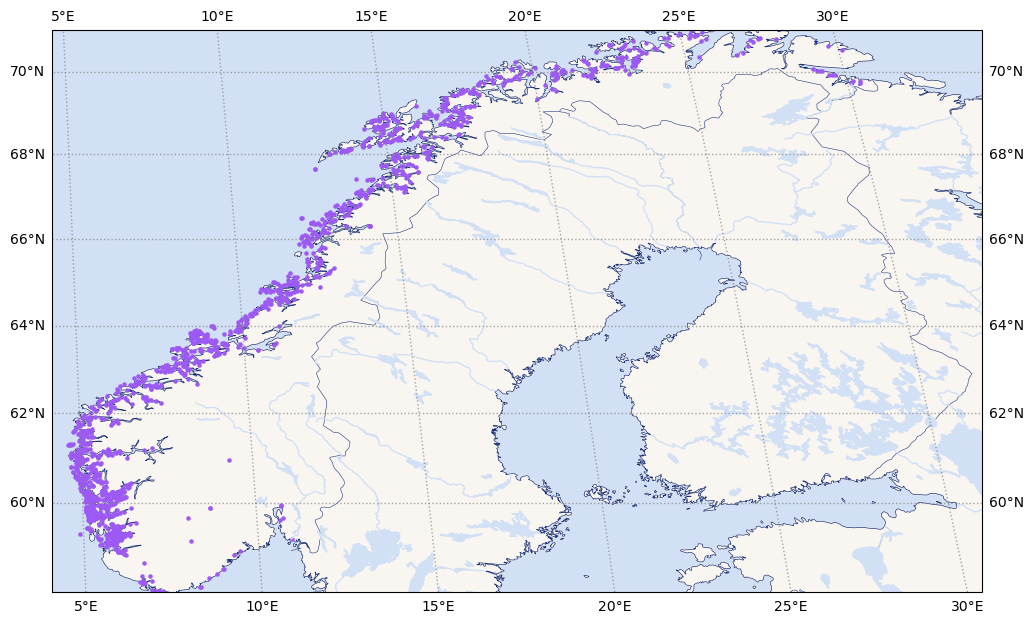

In [8]:
db_plt.plot_points(df)

### We can also just query for a specific region of the country by adding a polygon to our query

In [9]:
poly = "POLYGON ((5.0 59.0, 10 59, 10 64, 5 64, 5 59))"

In [10]:
filter1 = db.filter_data("COUNTRY", "=", "Norway")
df=db.query('Emodnet HA aquaculture - marine Finfish',
            filters=[filter1],
            poly=poly)

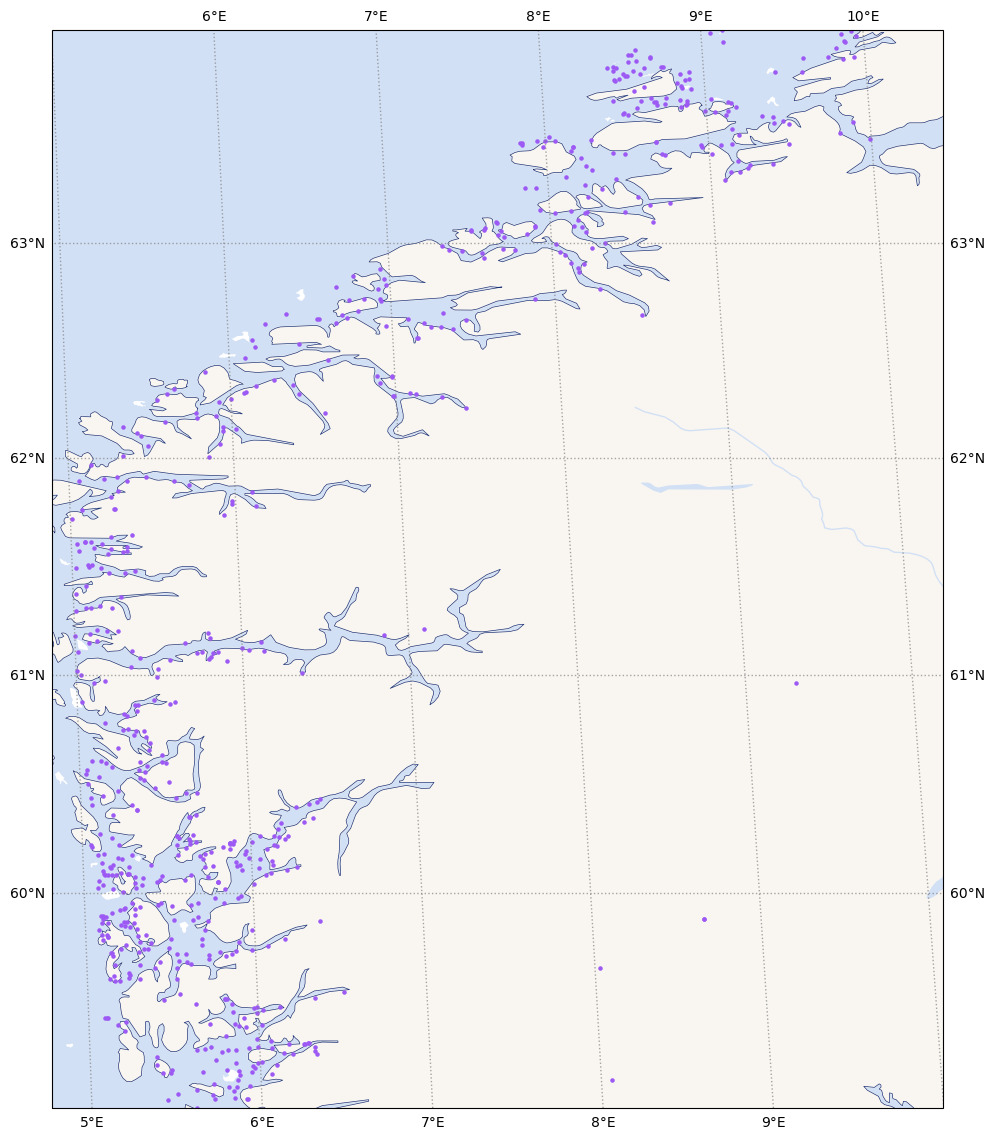

In [11]:
db_plt.plot_points(df)

### Let's see if any of them are in MPAS
#### Pull data for MPAS in Norway

In [12]:
filter1 = db.filter_data("country", "=", "Norway")
df_mpa = db.query("ProtectedSeas MPA Dataset",
                  filters=[filter1])
df_mpa.head(5)

,ogc_fid,site_id,site_name,url,country,state,managing_authority,designation,purpose,restrictions,allowed,definitions,coastline_match,regulation_name,regulation_url,season,effective_from,effective_to,latest_updates,protection_focus,species_of_concern,discharge_prohibited,removal_of_marine_life_is_prohibited,speed_restricted,entry_prohibited,diving_prohibited,removal_of_historic_artifacts_prohibited,stopping_prohibited,anchoring_prohibited,landing_prohibited,dragging_prohibited,dredging_prohibited,industrial_or_mineral_exploration_prohibited,construction_prohibited,drilling_prohibited,overflight_or_drones_prohibited,other_helpful_links,last_update,s57_cat,inshore_only,tribal,bottom_trawl,gillnetting,hook_n_line,trolling,nets,traps_n_pots,spear_fishing,longlining,misc_gear,recreational_restrictions,commercial_restrictions,wdpa_id,iucn_cat,gov_level,year_est,boundary_source,geometry,wkb_geometry_reduced,complexity
0,9953,AINOR201,Flø Wildlife Conservation Area,https://faktaark.naturbase.no/?id=VV00000552,Norway,None,Norwegian Directorate for Nature Management,Wildlife Conservation Area,The purpose of the sanctuary is to preserve an...,1. Vegetation that is valuable as habitat for ...,Fishing according to legislation and regulatio...,None,1.0,Regulations for the protection of the Flea bir...,https://www.lovdata.no/for/lf/mv/xv-19880527-0...,Year-round,None,None,Check the Directorate of Fisheries <a href=htt...,Ecosystem,Wetland birds,2.0,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,None,2019-04-11,4.0,0.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,155156,IV,None,1988.0,European Environment Agency - CDDA,"MULTIPOLYGON Z (((5.83400 62.38993 0.00000, 5....",01060000A0E6100000010000000103000080010000001F...,31
1,10293,AINOR551,Anda,MPA Website|https://faktaark.naturbase.no/?id=...,Norway,None,Norwegian Directorate for Nature Management,Nature Reserve,The purpose of the conservation is to preserve...,1. All vegetation (including seaweed and kelp)...,"1. Fishing, including anchoring, and mooring t...",None,0.0,"Regulations on Coastal Plan Nordland, Annex 68...",Regulations Text|https://www.lovdata.no/for/lf...,Year-round,,,"Check the Directorate of Fisheries <a href=""ht...",Ecosystem,"Seabirds, auks",2.0,1,3.0,2.0,3.0,3.0,3.0,0.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,None,2021-08-03,4.0,0.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,183109,Ia,None,2002.0,European Environment Agency - CDDA,"MULTIPOLYGON Z (((15.16204 69.06573 0.00000, 1...",01060000A0E61000000100000001030000800100000008...,8
2,9775,AINOR40,"Nautøy, Longholmen og Bukkholmen",MPA Website|https://faktaark.naturbase.no/?id=...,Norway,None,Norwegian Directorate for Nature Management,Nature Reserve,The purpose of this nature reserve is to prese...,1. The vegetation in water and on land is prot...,1. Fishing by registered fishermen with regist...,None,0.0,"Regulations for conservation of Nautøy, Longho...",Regulations Text|https://www.lovdata.no/for/lf...,Year-round,,,"Check the Directorate of Fisheries <a href=""ht...",Ecosystem,Seabirds,2.0,2,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0,None,2021-08-03,4.0,0.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,156235,Ia,None,1982.0,European Environment Agency - CDDA,"MULTIPOLYGON Z (((5.54702 59.23482 0.00000, 5....",01060000A0E61000000100000001030000800100000030...,48
3,10294,AINOR552,Svarteskjeret,https://faktaark.naturbase.no/?id=VV00001282,Norway,None,Norwegian Directorate for Nature Management,Nature Reserve,The purpose of the protection is to provide se...,1. All vegetation in water and on land is prot...,1. General transit while attending to shipwrec...,None,0.0,Regulations for the protection of the Svartesk...,https://www.lovdata.no/for/lf/mv/xv-19930528-0...,Year-round,None,None,Check the Directorate of Fisheries <a href=htt...,Ecosystem,Seabirds,2.0,1,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,2.0,None,2019-04-11,4.0,0.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,156336,Ia,None,1993.0,European

#### Let's visualize one

Flø Wildlife Conservation Area


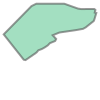

In [13]:
poly = df_mpa.iloc[0]["geometry"]
print(df_mpa.iloc[0]["site_name"])
poly

In [14]:
df_mpa.shape

(982, 60)

### Do a spatial join using geopandas functionality, documentation [here](https://geopandas.org/en/stable/docs/user_guide/mergingdata.html)

It looks like they've included Norway's entire EEZ, so let's filter that one out, along with "Norway Territorial Waters" first before joining


In [15]:
df_mpa=df_mpa[df_mpa.site_name != "Norway EEZ (0-200NM)"]
df_mpa=df_mpa[df_mpa.site_name != "Norway Territorial Waters"]

In [16]:
dff = df.sjoin(df_mpa, how="inner", predicate='intersects')

In [17]:
dff.head()

,OBJECTID,COUNTRY,OWNER_NAME,PRODUCTION,PURPOSE,SPECIES_DE,SITE_ID,COAST_DIST,POSITION_C,STATUS,POINT_INFO,COD,HALIBUT,LUMPFISH,EEL,SALMON,SEABASS,SEABREAM,TROUT,TUNA,TURBOT,SOLE,OTHER_SPEC,FARM_TYPE,PRODUCTI_1,geometry,latitude,longitude,index_right,ogc_fid,site_id,site_name,url,country,state,managing_authority,designation,purpose,restrictions,allowed,definitions,coastline_match,regulation_name,regulation_url,season,effective_from,effective_to,latest_updates,protection_focus,species_of_concern,discharge_prohibited,removal_of_marine_life_is_prohibited,speed_restricted,entry_prohibited,diving_prohibited,removal_of_historic_artifacts_prohibited,stopping_prohibited,anchoring_prohibited,landing_prohibited,dragging_prohibited,dredging_prohibited,industrial_or_mineral_exploration_prohibited,construction_prohibited,drilling_prohibited,overflight_or_drones_prohibited,other_helpful_links,last_update,s57_cat,inshore_only,tribal,bottom_trawl,gillnetting,hook_n_line,trolling,nets,traps_n_pots,spear_fishing,longlining,misc_gear,recreational_restrictions,commercial_restrictions,wdpa_id,iucn_cat,gov_level,year_est,boundary_source,wkb_geometry_reduced,complexity
95,1278,Norway,MARINE HARVEST NORWAY AS,Hatchery,Commercial,"Salmon, Rainbow trout, Trout",NW_0062,108.774946,Within the coastline,Active,Original,No,No,No,No,Yes,No,No,Yes,No,No,No,No,Salmon-Trout,n.a.,POINT (5.85135 62.40085),62.400852,5.851353,604,9952,AINOR200,Flø Zoological Protection of Species Area,https://faktaark.naturbase.no/?id=VV00001391,Norway,None,Norwegian Directorate for Nature Management,Bird Sanctuary,The purpose of the sanctuary is to preserve an...,1. Vegetation that is valuable as habitat for ...,Fishing according to legislation and regulatio...,None,1.0,Regulations for the protection of the Flea bir...,https://www.lovdata.no/for/lf/mv/xv-19880527-0...,Year-round,None,None,Check the Directorate of Fisheries <a href=htt...,Ecosystem,Multiple,2.0,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,None,2019-04-11,5.0,0.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,156688,None,None,1988.0,European Environment Agency - CDDA,01060000A0E61000000100000001030000800300000052...,120
425,2012,Norway,SALMAR FARMING AS,Grow out for human consumption,Commercial,"Salmon, Rainbow trout, Trout",NW_0856,1297.587515,At sea,Active,Original,No,No,No,No,Yes,No,No,Yes,No,No,No,No,Salmon-Trout,n.a.,POINT (7.92807 63.25652),63.256517,7.928067,909,9918,AINOR164,Sør-Smøla,MPA Website|https://faktaark.naturbase.no/?id=...,Norway,None,Norwegian Directorate for Nature Management,Protected Landscape,The purpose of the area is to preserve a uniqu...,1. The area is protected from action that can ...,1. Manual seaweed harvesting.<br>2. Machine ha...,None,0.0,Regulations on protection plan for Smøla. Appe...,Regulations Text|https://www.lovdata.no/for/lf...,Year-round,,,"Check the Directorate of Fisheries <a href=""ht...",Ecosystem,"Seabirds, otter",3.0,1,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,None,2021-08-03,4.0,0.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,392917,IV,None,2009.0,European Environment Agency - CDDA,01060000A0E61000000100000001030000800100000028...,296
530,2302,Norway,SALMAR FARMING AS,Grow out for human consumption,Commercial,"Salmon, Rainbow trout, Trout",NW_1139,290.655385,At sea,Active,Original,No,No,No,No,Yes,No,No,Yes,No,No,No,No,Salmon-Trout,n.a.,POINT (7.85693 63.25500),63.255000,7.856933,909,9918,AINOR164,Sør-Smøla,MPA Website|https://faktaark.naturbase.no/?id=...,Norway,None,Norwegian Directorate for Nature Management,Protected Landscape,The purpose of the area is to preserve a uniqu...,1. The area is protected from action that can ...,1. Manual seaweed harvesting.<br>2. Machine ha...,None,0.0,Regulations on protection plan for Smøla. Appe...,Regulations Text|https://www.lovdata.no/for/lf...,Year-round,,,"Check the Directorate of Fisheries <a href=""ht...",Ecosystem,"Seabirds, otter",3.0,1,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,None,202

In [18]:
## Looks like 5 of the farms are in MPAs
df.shape, dff.shape

((653, 28), (5, 88))

### Let's play around with some gridded data

#### The following shows the available gridded datasets.
#### Alternatively check out the data catalog in the [Ocean Data Explorer search bar](https://app.oceandata.earth/explorer)

In [19]:
gd.datasets

,provider_acronym,database_description,table_description,homepage,citation,subject,tags,units
name,,,,,,,,
World Ocean Atlas 2018 Nitrate - 1degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia, H. E., K. Weathers, C. R. Paver, I. Sm...","global climatological trends, objectively anal...","[climatological distributions, nutrients, nitr...",[micromole per kilogram]
World Ocean Atlas 2018 Conductivity - 1degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia, H. E., K. Weathers, C. R. Paver, I. Sm...","global climatological trends, objectively anal...","[climatological distributions, conductivity, o...",[Siemens per meter]
World Ocean Atlas 2018 Phosphate - 1degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia, H. E., K. Weathers, C. R. Paver, I. Sm...","global climatological trends, objectively anal...","[climatological distributions, nutrients, phos...",[micromole per kilogram]
World Ocean Atlas 2018 Density - 1degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia, H. E., K. Weathers, C. R. Paver, I. Sm...","global climatological trends, objectively anal...","[climatological distributions, density, object...",[kilogram per cubic metere]
World Ocean Atlas 2018 Temperature - 0.25degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia H.E., T.P. Boyer, O.K. Baranova, R.A. L...","global climatological trends, objectively anal...","[climatological distributions, atlas, temperat...",[celsius]
World Ocean Atlas 2018 Salinity - 1degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Zweng, M. M., J. R. Reagan, D. Seidov, T. P. B...","global climatological trends, objectively anal...","[climatological distributions, salinity, objec...",[dimensionless]
World Ocean Atlas 2018 Oxygen - 1degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia, H. E., K. Weathers, C. R. Paver, I. Sm...","global climatological trends, objectively anal...","[climatological distributions, oxygen, objecti...",[micromole per kilogram]
Vessel Traffic and CO2 Emissions,[HUB],Global gridded CO2 emissions and traffic densi...,Global CO2 emissions and total number of hours...,https://oceandata.earth,"HUB Ocean, Vessel Traffic and CO2 Emissions","global vessel emissions, traffic density, ghg","[emissions, vessels]","[grams, hours]"
GEBCO gridded bathymetry data,[GEBCO],GEBCO's aim is to provide the most authoritati...,"GEBCO’s current gridded bathymetric data set, ...",https://www.gebco.net/data_and_products/gridde...,GEBCO Compilation Group (2021) GEBCO 2021 Grid...,global ocean and land terrain models,"[bathymetry, gridded, seabed, terrain]",[meters]


In [20]:
## Feel free to click though the coordinates and variables (little data icon), and information about them (little paper icon)
ds= gd.open_dataset('global-analysis-forecast-bio-001-028-monthly')
ds

<xarray.Dataset>
Dimensions:    (time: 31, depth: 50, latitude: 681, longitude: 1440)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * time       (time) datetime64[ns] 2020-11-16 ... 2023-05-16T12:00:00
Data variables:
    chl        (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 171, 360), meta=np.ndarray>
    dissic     (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 171, 360), meta=np.ndarray>
    fe         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 171, 360), meta=np.ndarray>
    no3        (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 171, 360), meta=np.ndarray>
    nppv       (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 171, 360), meta=np.ndarray>
    o2         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 171, 360), meta=np.ndarray>
    ph         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 171, 360), meta=np.ndarray>
    phyc       (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 171, 360), meta=np.ndarray>
    po4        (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 171, 360), meta=np.ndarray>
    si         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 171, 360), meta=np.ndarray>
    spco2      (time, latitude, longitude) float32 dask.array<chunksize=(1, 171, 720), meta=np.ndarray>
    talk       (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 171, 360), meta=np.ndarray>
Attributes:
    Conventions:                   CF-1.6
    area:                          GLOBAL
    contact:                       servicedesk.cmems@mercator-ocean.eu
    credit:                        E.U. Copernicus Marine Service Information...
    institution:                   Mercator Ocean
    licence:                       http://marine.copernicus.eu/services-portf...
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR BIOMER4V2R1
    title:                         Monthly mean fields for product GLOBAL_ANA...

#### Using built-in [xarray functionality](https://docs.xarray.dev/en/stable/user-guide/indexing.html) we can easily slice to time and place we are interested in. 

In [21]:
ds_slice = ds.sel(
            longitude=slice(0,30),
            latitude=slice(50,70),
            time=slice('2021-01-01', '2022-12-31'))

ds_slice

<xarray.Dataset>
Dimensions:    (time: 24, depth: 50, latitude: 81, longitude: 121)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 50.0 50.25 50.5 50.75 ... 69.5 69.75 70.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 29.25 29.5 29.75 30.0
  * time       (time) datetime64[ns] 2021-01-16T12:00:00 ... 2022-12-16T12:00:00
Data variables:
    chl        (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 81, 121), meta=np.ndarray>
    dissic     (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 81, 121), meta=np.ndarray>
    fe         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 81, 121), meta=np.ndarray>
    no3        (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 81, 121), meta=np.ndarray>
    nppv       (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 81, 121), meta=np.ndarray>
    o2         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 81, 121), meta=np.ndarray>
    ph         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 81, 121), meta=np.ndarray>
    phyc       (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 81, 121), meta=np.ndarray>
    po4        (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 81, 121), meta=np.ndarray>
    si         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 81, 121), meta=np.ndarray>
    spco2      (time, latitude, longitude) float32 dask.array<chunksize=(1, 81, 121), meta=np.ndarray>
    talk       (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 7, 81, 121), meta=np.ndarray>
Attributes:
    Conventions:                   CF-1.6
    area:                          GLOBAL
    contact:                       servicedesk.cmems@mercator-ocean.eu
    credit:                        E.U. Copernicus Marine Service Information...
    institution:                   Mercator Ocean
    licence:                       http://marine.copernicus.eu/services-portf...
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR BIOMER4V2R1
    title:                         Monthly mean fields for product GLOBAL_ANA...

#### Using built-in [xarray functionality](https://docs.xarray.dev/en/stable/user-guide/plotting.html) we can easily slice visualize the data
#### I am using the [cmocean](https://matplotlib.org/cmocean/) library for the colormap, but you can use one of your choice

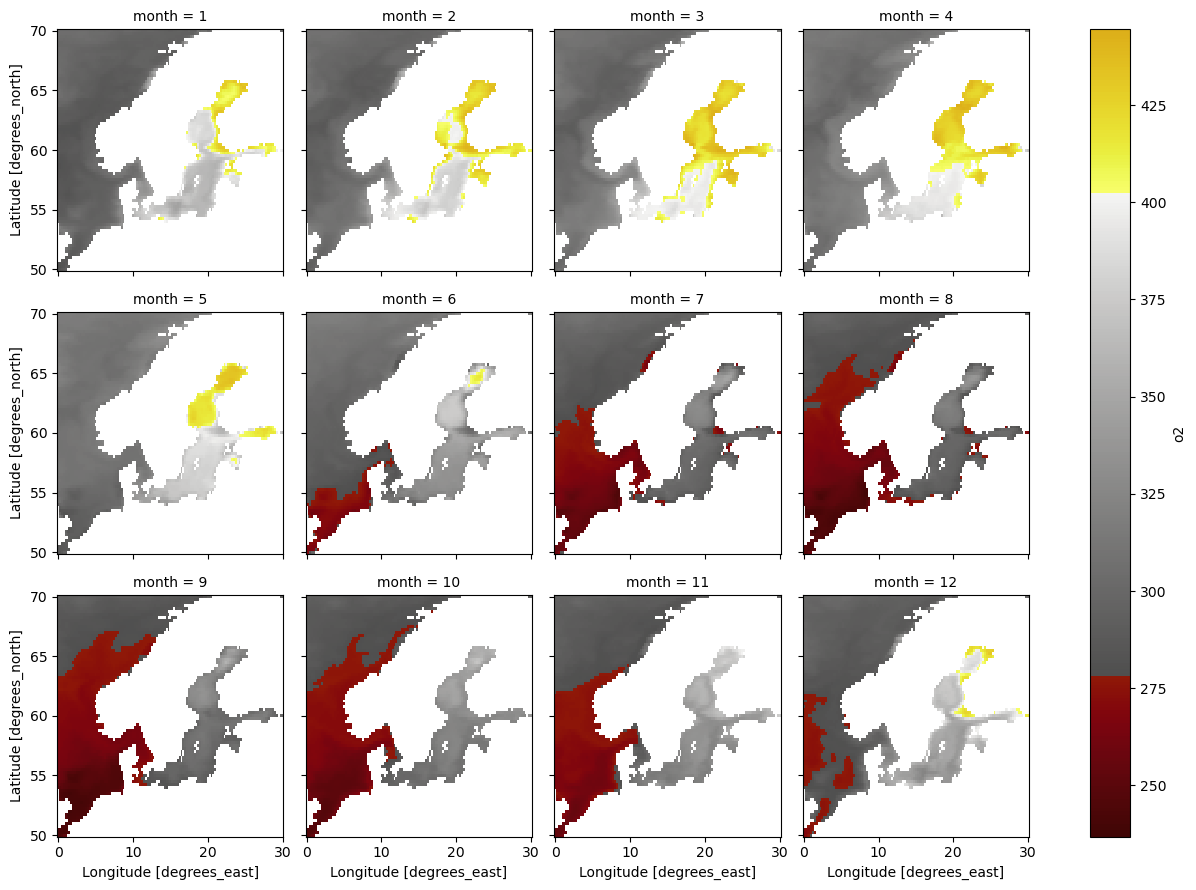

In [22]:
monthly_means = ds_slice.isel(depth=0).groupby("time.month").mean()
fg = monthly_means.o2.plot(
    col="month",
    col_wrap=4,
    cmap=cmocean.cm.oxy,
)

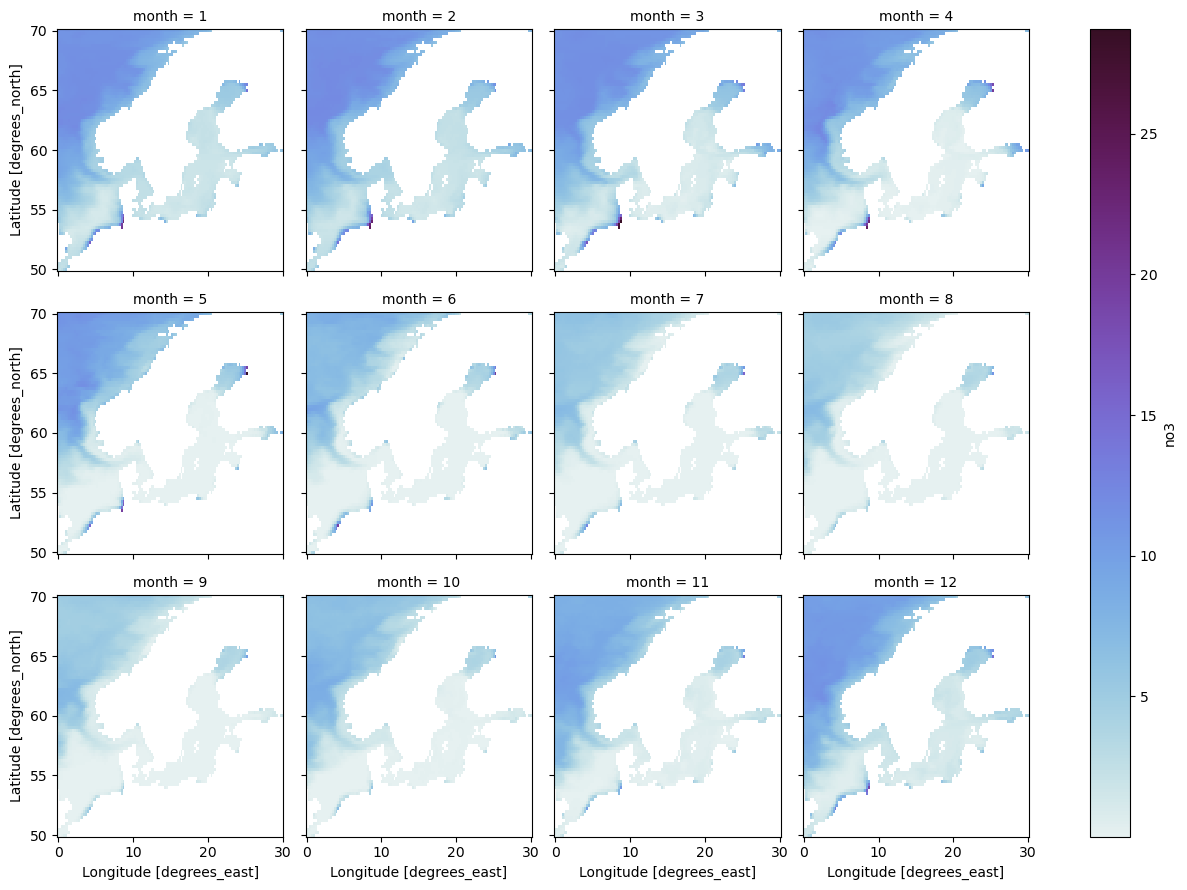

In [23]:
monthly_means = ds_slice.isel(depth=0).groupby("time.month").mean()
fg = monthly_means.no3.plot(
    col="month",
    col_wrap=4,
    cmap=cmocean.cm.dense,
)

#### You can select a specific depth and plot the data variables for that depth over time  

In [24]:
ds_time = ds_slice.isel(depth=0)
ds_time

<xarray.Dataset>
Dimensions:    (time: 24, latitude: 81, longitude: 121)
Coordinates:
    depth      float32 0.494
  * latitude   (latitude) float32 50.0 50.25 50.5 50.75 ... 69.5 69.75 70.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 29.25 29.5 29.75 30.0
  * time       (time) datetime64[ns] 2021-01-16T12:00:00 ... 2022-12-16T12:00:00
Data variables:
    chl        (time, latitude, longitude) float32 dask.array<chunksize=(1, 81, 121), meta=np.ndarray>
    dissic     (time, latitude, longitude) float32 dask.array<chunksize=(1, 81, 121), meta=np.ndarray>
    fe         (time, latitude, longitude) float32 dask.array<chunksize=(1, 81, 121), meta=np.ndarray>
    no3        (time, latitude, longitude) float32 dask.array<chunksize=(1, 81, 121), meta=np.ndarray>
    nppv       (time, latitude, longitude) float32 dask.array<chunksize=(1, 81, 121), meta=np.ndarray>
    o2         (time, latitude, longitude) float32 dask.array<chunksize=(1, 81, 121), meta=np.ndarray>
    ph         (time, latitude, longitude) float32 dask.array<chunksize=(1, 81, 121), meta=np.ndarray>
    phyc       (time, latitude, longitude) float32 dask.array<chunksize=(1, 81, 121), meta=np.ndarray>
    po4        (time, latitude, longitude) float32 dask.array<chunksize=(1, 81, 121), meta=np.ndarray>
    si         (time, latitude, longitude) float32 dask.array<chunksize=(1, 81, 121), meta=np.ndarray>
    spco2      (time, latitude, longitude) float32 dask.array<chunksize=(1, 81, 121), meta=np.ndarray>
    talk       (time, latitude, longitude) float32 dask.array<chunksize=(1, 81, 121), meta=np.ndarray>
Attributes:
    Conventions:                   CF-1.6
    area:                          GLOBAL
    contact:                       servicedesk.cmems@mercator-ocean.eu
    credit:                        E.U. Copernicus Marine Service Information...
    institution:                   Mercator Ocean
    licence:                       http://marine.copernicus.eu/services-portf...
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR BIOMER4V2R1
    title:                         Monthly mean fields for product GLOBAL_ANA...

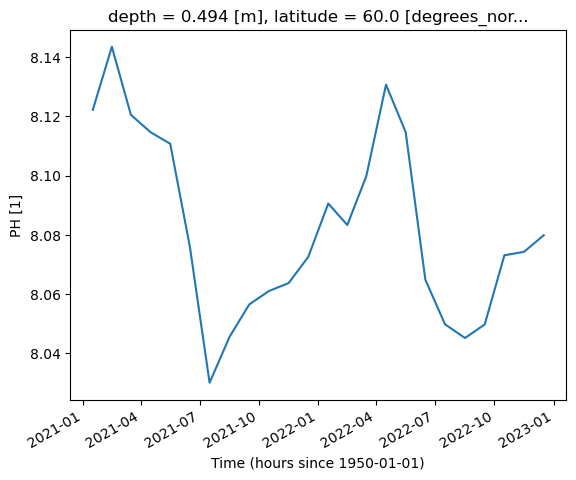

In [25]:
d_time = ds_time.ph.sel(longitude=5, latitude=60, method="nearest")
d_time.plot()

## Challenge

#### Pick a an area with many farms from the Emodnet HA aquaculture - marine Finfish dataset or pick other industry assets from other Emodnet Human Activity datasets
You can filter for a specific Owner/Company if you like 

Using the "global-ocean-biogeochemistry-hindcast-monthly mean" plot different variables in that location<br>
What are some trends?
Can you do extra research on when the farm was established?<br>
What other organisms are in that area?<br>
Are there other industries operating in that same area?<br>
Are there seasonal differences? <br>
Create whichever visualizations you think are releveant